### Book Recommender System
### Dataset : " https://www.kaggle.com/zygmunt/goodbooks-10k "

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

G:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import the datasets. I am loading it from a local folder

book_tags = pd.read_csv("C:/Users/Reya/Downloads/GoodReads/book_tags.csv")
books = pd.read_csv("C:/Users/Reya/Downloads/GoodReads/books.csv")
ratings = pd.read_csv("C:/Users/Reya/Downloads/GoodReads/ratings.csv")
tags = pd.read_csv("C:/Users/Reya/Downloads/GoodReads/tags.csv")

###### Perform EDA to see how the datasets look like

In [3]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [4]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [5]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [6]:
ratings["book_id"].nunique()

10000

In [7]:
ratings.shape

(981756, 3)

In [8]:
ratings["user_id"].nunique()

53424

This means that one book might have many reviews and many users might have provided multiple reviews for each book.

In [9]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


Check for missing data from the Books dataset

In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

isbn, isbn13, publications years, original title and language codes have missing values

In [11]:
books.original_title.unique()

array(['The Hunger Games', "Harry Potter and the Philosopher's Stone",
       'Twilight', ..., 'The Mauritius Command',
       'Cinderella Ate My Daughter: Dispatches from the Frontlines of the New Girlie-Girl Culture',
       'The First World War'], dtype=object)

In [12]:
books.title.unique()

array(['The Hunger Games (The Hunger Games, #1)',
       "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
       'Twilight (Twilight, #1)', ..., 'The Mauritius Command',
       'Cinderella Ate My Daughter: Dispatches from the Frontlines of the New Girlie-Girl Culture',
       'The First World War'], dtype=object)

In [13]:
books.original_publication_year.isnull().sum()

21

In [14]:
print(books.original_publication_year)

0       2008.0
1       1997.0
2       2005.0
3       1960.0
4       1925.0
         ...  
9995    2010.0
9996    1990.0
9997    1977.0
9998    2011.0
9999    1998.0
Name: original_publication_year, Length: 10000, dtype: float64


In [15]:
books['original_publication_year'] = books['original_publication_year'].fillna(-1).apply(lambda x: int(x) if x != -1 else -1)

In [16]:
books['original_publication_year'].isnull().sum()

0

Removed null values in original publication year

In [17]:
books['original_publication_year'].unique()

array([ 2008,  1997,  2005,  1960,  1925,  2012,  1937,  1951,  2000,
        1813,  2003,  2011,  1949,  1945,  1947,  2009,  1999,  1954,
        2010,  2002,  1998,  2007,  1595,  1988,  1993,  1950,  1996,
        2006,  1868,  1847,  2001,  1953,  1974,  1979,  1932,  1884,
        1952,  2015,  1995,  2004,  1969,  1936,  1985,  1818,  1977,
        1811,  -720,  1946,  1859,  1990,  1964,  1989,  1958,  1973,
        1967,  1911,  1891,  1897,  1963,  1844,  2013,  1862,  1961,
        1876,  1962,  1955,  1991,  1600,  1965,  1939,  1908,  1850,
        2014,  1606,  1860,  1942,  1978,  1815,  1877,  1986,  1866,
        1922,  1987,  1851,  1982,  1843,  1976,  1994,  1915,  1956,
          -1,  1980,  1865,  1817,  1957,  1926,  1943,  1938,  1966,
        1981,  2016,  1992,  1984,  1972,  1882,  1895,  1899,  1983,
        -750,  1900,  1975,  1971,  1603,  1929,  1968,  1838,  1903,
        1886,  1940,  -500,  1887,  1931,  1611,  1814,  1719,  1513,
        1880,  1923,

In [44]:
#rename some columns and slicing the dataset
df1= books.head(20)
df1.rename(columns={'ratings_1':'R1', 'ratings_2':'R2','ratings_3':'R3','ratings_4':'R4','ratings_5':'R5'}, inplace=True)

G:\Anaconda\lib\site-packages\pandas\core\frame.py:4298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [45]:
books_list= list(df1['title'].unique())

In [46]:
books_list

['The Hunger Games (The Hunger Games, #1)',
 "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
 'Twilight (Twilight, #1)',
 'To Kill a Mockingbird',
 'The Great Gatsby',
 'The Fault in Our Stars',
 'The Hobbit',
 'The Catcher in the Rye',
 'Angels & Demons  (Robert Langdon, #1)',
 'Pride and Prejudice',
 'The Kite Runner',
 'Divergent (Divergent, #1)',
 '1984',
 'Animal Farm',
 'The Diary of a Young Girl',
 'The Girl with the Dragon Tattoo (Millennium, #1)',
 'Catching Fire (The Hunger Games, #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)',
 'The Fellowship of the Ring (The Lord of the Rings, #1)',
 'Mockingjay (The Hunger Games, #3)']

In [52]:
df1.average_rating.mean()

4.140000000000001

In [61]:
#plot the graph of the top rated books
x_ax = df1.average_rating[df1.average_rating>4.1]
books_list = df1.title[df1.average_rating>4.1]

In [62]:
books_list
print(x_ax)

0     4.34
1     4.44
3     4.25
5     4.26
6     4.25
9     4.24
10    4.26
11    4.24
12    4.14
15    4.11
16    4.30
17    4.53
18    4.34
Name: average_rating, dtype: float64


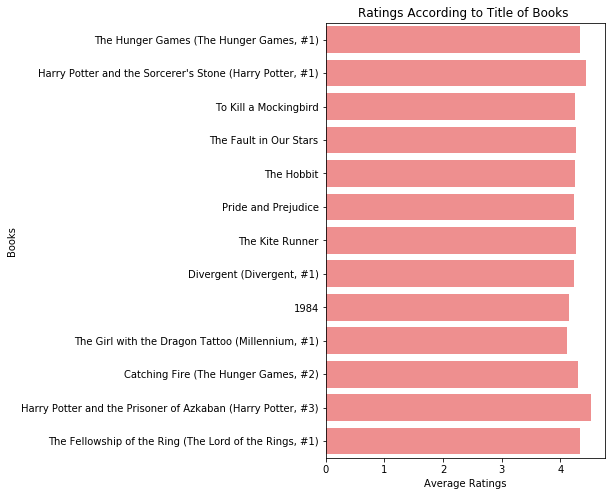

In [63]:
f,ax = plt.subplots(figsize = (5,8))
sns.barplot(x=x_ax,y=books_list,color='red',alpha = 0.5,label='Average ratings' )
ax.set(xlabel='Average Ratings', ylabel='Books',title = "Ratings According to Title of Books ")
plt.show()

In [64]:
#try the same thing for the whole dataset
books['average_rating'].mean()

4.002191000000001

In [65]:
x_ax = books.average_rating[books.average_rating>4.5]
books_list = books.title[books.average_rating>4.5]

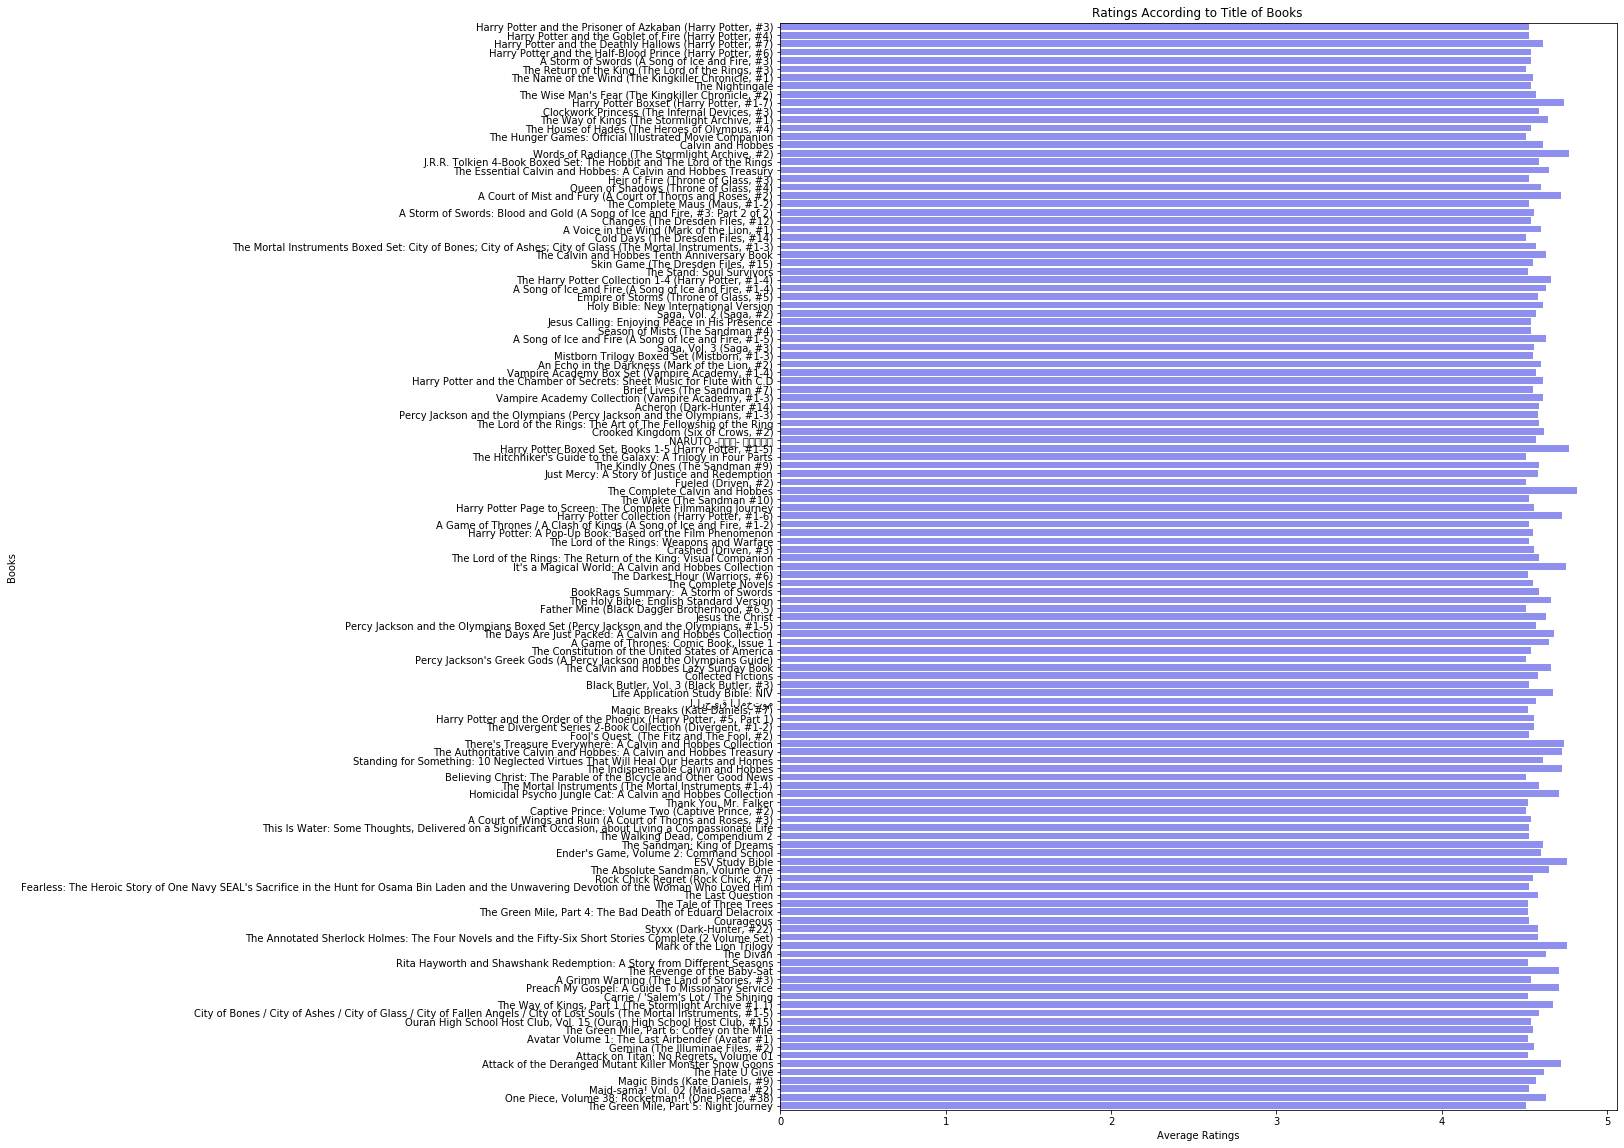

In [69]:
f,ax = plt.subplots(figsize = (15,20))
sns.barplot(x=x_ax,y=books_list,color='blue',alpha = 0.5,label='Average ratings' )
ax.set(xlabel='Average Ratings', ylabel='Books',title = "Ratings According to Title of Books ")
plt.show()

These books are more likely to be in the recommendation list

###  Book Recommendation based on IMDB weighted formula

The IMDB formula for finding weighted rates is 
(v/(v+m).R)+(m/(v+m).C)

In [40]:
v = books['ratings_count']
m = books['ratings_count'].quantile(0.95)
R = books['average_rating']
C = books['average_rating'].mean()
W = (R*v + C*m) / (v + m)

#v - no. of ratings
#m - minimum ratings the book needs to be listed
#R - Average Rating of a book
#C - Mean of the average ratings
#W - Weighted rate of the book

In [41]:
#add another column in the dataset for weighted ratings
books['weighted_rating'] = W

In [42]:
top_rated_books  = books.sort_values('weighted_rating', ascending=False).head(250)

In [71]:
graph = top_rated_books[['title', 'authors', 'average_rating', 'weighted_rating']].head(15)

### These are the top books which will be recommended to the user

In [77]:
graph

,title,authors,average_rating,weighted_rating
24,Harry Potter and the Deathly Hallows (Harry Po...,"[j.k.rowling, marygrandpré]",4.61,4.555956
26,Harry Potter and the Half-Blood Prince (Harry ...,"[j.k.rowling, marygrandpré]",4.54,4.490428
17,Harry Potter and the Prisoner of Azkaban (Harr...,"[j.k.rowling, marygrandpré, rufusbeck]",4.53,4.485090
23,Harry Potter and the Goblet of Fire (Harry Pot...,"[j.k.rowling, marygrandpré]",4.53,4.483227
1,Harry Potter and the Sorcerer's Stone (Harry P...,"[j.k.rowling, marygrandpré]",4.44,4.424365
20,Harry Potter and the Order of the Phoenix (Har...,"[j.k.rowling, marygrandpré]",4.46,4.419054
30,The Help,[kathrynstockett],4.45,4.405158
38,"A Game of Thrones (A Song of Ice and Fire, #1)",[georger.r.martin],4.45,4.398759
134,"A Storm of Swords (A Song of Ice and Fire, #3)",[georger.r.martin],4.54,4.396645
421,"Harry Potter Boxset (Harry Potter, #1-7)",[j.k.rowling],4.74,4.391147


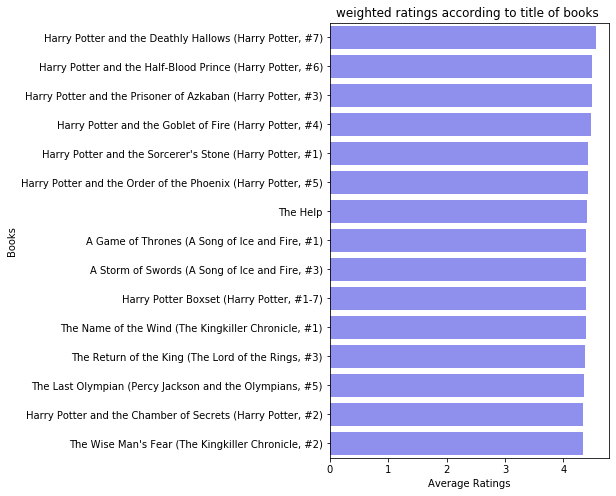

In [75]:
f,ax = plt.subplots(figsize = (5,8))
sns.barplot(x=graph.weighted_rating,y=graph.title,color='blue',alpha = 0.5,label='Average ratings' )
ax.set(xlabel='Average Ratings', ylabel='Books',title = "weighted ratings according to title of books ")
plt.show()